In [1]:
import numpy as np
import pandas

from graphing.sampling_graphs import create_sample_distribution_graph_groupings, create_grouping_influence_graph, create_sample_distribution_graph
from learning.grouped_learning import Berta
from learning.grouped_linear_regression import Gustav
from model.datasets import Datasets, SynDataset
from model.synth_data_factory import SyntheticDataBuilder
from sampling.from_tests_sampler import FromTestsSamplingStrategy
from sampling.group_sampling.hamming_group_sampling_strategy import HammingGroupSamplingStrategy
from sampling.random_sampling.better_random_sampling_strategy import BetterRandomSamplingStrategy
from sampling.sampler import Sampler
from testing.grouped_tester import GroupedTester
from testing.grouped_tester_flipping import GroupedTesterSigns
from testing.tester import Tester
from util.util import get_samples_with_results, get_regression_metricts, make_df_representation
from sampling.group_sampling.mutex_aware_group_sampling_strategy import MutexAwareGroupSamplingStrategy
from util.util import get_samples_with_results_full

from sklearn import linear_model
pandas.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'MutexAwareGroupSamplingStrategy' from 'sampling.group_sampling.mutex_aware_group_sampling_strategy' (/home/zwisler/Desktop/projects/bachelor/playground/group_sampling/sampling/group_sampling/mutex_aware_group_sampling_strategy.py)

# Data Generation

In [26]:
data_builder = SyntheticDataBuilder(
    parameters=10,
    influential_parameters=1,
    mutex_groups=[],
    mutex_required=[],
    constrains=0,
    interactions=1
)
data_builder.print_overview()
influential_params = [i - 1 for i in data_builder.influential_features]
vm, test_strategy = data_builder.get_vm(), data_builder.get_testing_strategy()
vm, test_strategy = Datasets().get_dataset('javagc')


Synthetic data generation:
 Generated 10 Parameters
 0 mutex groups
 0 Constrains
 Influential features: [3]
 Weightings: [4, 9, 70, 6, 6, 5, 7, 9, 8, 4]
 Interacting features:
  - [4, 10]


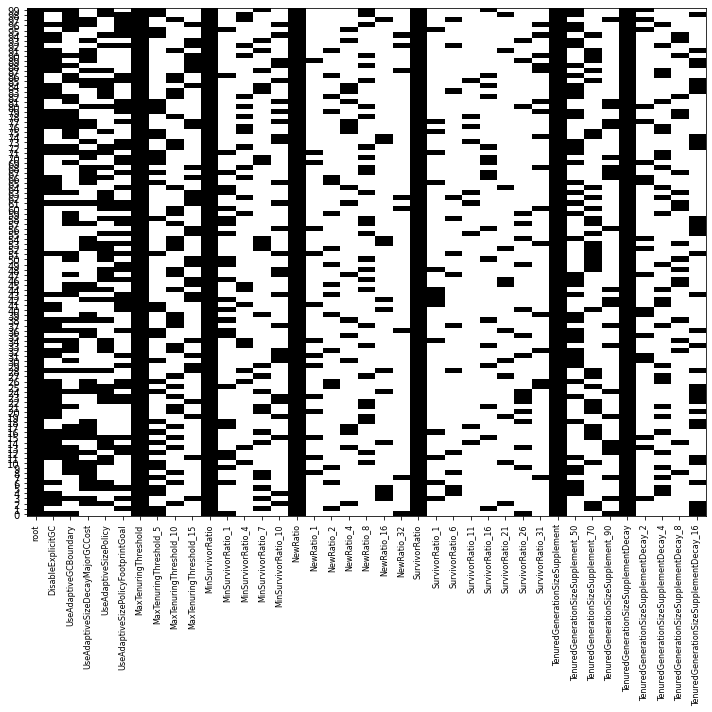

In [27]:
tester = Tester(test_strategy)
sampler_test = Sampler(FromTestsSamplingStrategy(vm, test_strategy))
#sampler_test = Sampler(BetterRandomSamplingStrategy(vm))

x_test, y_test, samples_test = get_samples_with_results_full(sampler_test, tester, 100)
create_sample_distribution_graph(samples_test, vm)

# Sampling

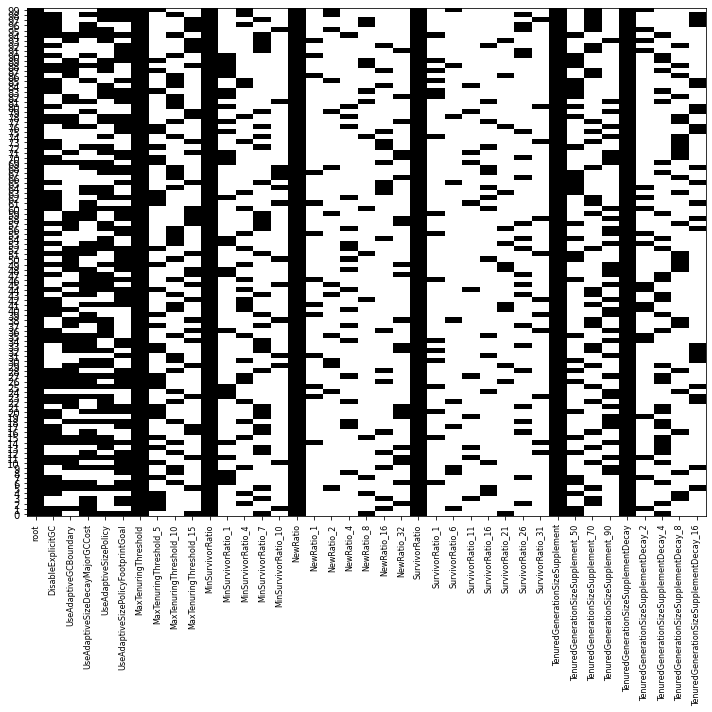

In [28]:
sampler = Sampler(BetterRandomSamplingStrategy(vm))
x, y, samples = get_samples_with_results_full(sampler_test, tester, 100)
#display((make_df_representation(x, y)))sampler.reset()
create_sample_distribution_graph(samples, vm)

In [29]:
clf = linear_model.LinearRegression()
clf.fit(x, y)
y_predicted = clf.predict(x_test)
metrics = get_regression_metricts(y_test, y_predicted)

print(metrics)

[37.34885133333334, 2167.242302387356, 0.4875071036333406, 0.9298099498106399]


6527370284839752.0


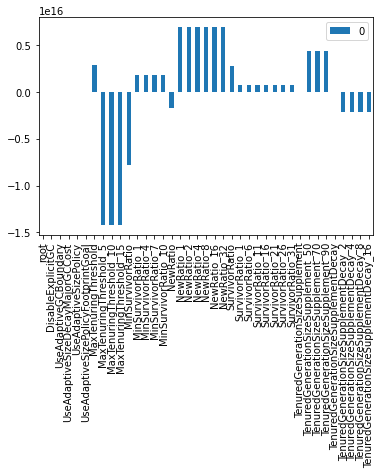

In [30]:
coef = pandas.DataFrame( clf.coef_)
ax = coef.plot.bar()
ax.set_xticklabels(vm.get_features())
print(clf.intercept_)

,root,DisableExplicitGC,UseAdaptiveGCBoundary,UseAdaptiveSizeDecayMajorGCCost,UseAdaptiveSizePolicy,UseAdaptiveSizePolicyFootprintGoal,MaxTenuringThreshold,MaxTenuringThreshold_5,MaxTenuringThreshold_10,MaxTenuringThreshold_15,MinSurvivorRatio,MinSurvivorRatio_1,MinSurvivorRatio_4,MinSurvivorRatio_7,MinSurvivorRatio_10,NewRatio,NewRatio_1,NewRatio_2,NewRatio_4,NewRatio_8,NewRatio_16,NewRatio_32,SurvivorRatio,SurvivorRatio_1,SurvivorRatio_6,SurvivorRatio_11,SurvivorRatio_16,SurvivorRatio_21,SurvivorRatio_26,SurvivorRatio_31,TenuredGenerationSizeSupplement,TenuredGenerationSizeSupplement_50,TenuredGenerationSizeSupplement_70,TenuredGenerationSizeSupplement_90,TenuredGenerationSizeSupplementDecay,TenuredGenerationSizeSupplementDecay_2,TenuredGenerationSizeSupplementDecay_4,TenuredGenerationSizeSupplementDecay_8,TenuredGenerationSizeSupplementDecay_16,performance
0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,34.583000
1,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,26.497100
2,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,32.288967
3,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,33.385033
4,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,33.233900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193531,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,254.273240
193532,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,249.088640
193533,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,248.256320
193534,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,251.927780


<AxesSubplot:>

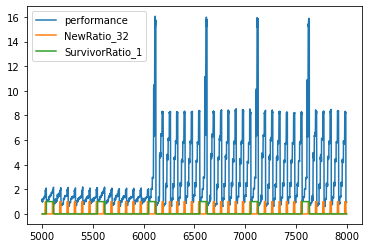

In [39]:
df = pandas.read_csv('./resources/javagc_measurements.csv', delimiter=";")
display(df)
df['performance'] = df['performance'] / 30
df[['performance','NewRatio_32','SurvivorRatio_1']][5000:8000].plot()